# CPS1.1 - Computer Problem Set 1.1
### **The Cox-Ross-Rubinstein model**

## 1 - Introduction

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
sigma = 0.3
b = 0.05
r = 0.05
n = 50
T = 2
S0 = 100

def h(n) :
    return T/n
def u(n) :
    return np.exp(b*h(n) + sigma*np.sqrt(h(n)))
def d(n) :
    return np.exp(b*h(n) - sigma*np.sqrt(h(n)))
def p(n) :
    return (np.exp(r*h(n)) - d(n))/(u(n) - d(n))

(a) Function **Sn**

In [3]:
def Sn(T,n,b,sigma,j) :
    out = []
    for i in range(0,j+1) :
        out.append(S0*u(n)**(j-i)*d(n)**(i))
    return out

(b) Function **Payoffn**

In [4]:
def Payoffn(T,n,b,sigma,K) :
    out = []
    for i in range(0,n+1) :
        out.append(max(Sn(T,n,b,sigma,n)[i]-K,0))
    return out

(c) Function **Calln**

In [5]:
def Calln(T,n,r,b,sigma,K) :
    out = Payoffn(T,n,b,sigma,K)

    for i in range(n-1,-1,-1) :
        for j in range(0,i+1) :
            out[j] = np.exp(-r*h(n))*(out[j]*p(n) + out[j+1]*(1-p(n)))
    return out[0]

(d) Function **Deltan**

In [6]:
def Deltan(T,n,r,b,sigma,K,j) : 
    Cu = max(Sn(T,n,b,sigma,j+1)-K,0)
    Cd = max(Sn(T,n,b,sigma,j)-K,0)
    


(e) Dependence between **Calln** & **Deltan**

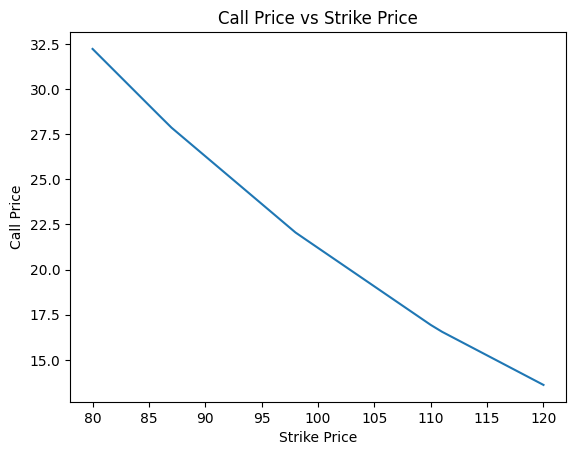

In [7]:
Klist = [80+i for i in range(0,41)]

#Deltalist = []
Callnlist = []
for K in Klist :
    Callnlist.append(Calln(T,n,r,b,sigma,K))
    # Deltalist.append(Deltan(T,n,r,b,sigma,K,n//2))

# plt.plot(Klist,Deltalist)
plt.plot(Klist,Callnlist)
plt.xlabel('Strike Price')
plt.ylabel('Call Price')
plt.title('Call Price vs Strike Price')
plt.show()



## 2 - Black-Scholes formula

(a) Function **Call**

In [8]:
def dplus(s,k,v) :
    return ((np.log(s/k))/(np.sqrt(v)) + (np.sqrt(v))/2)
def dminus(s,k,v) :
    return ((np.log(s/k))/(np.sqrt(v)) - (np.sqrt(v))/2)
#----------------------------------------------#
def Call(T,r,sigma,K):
    return S0*stats.norm.cdf(dplus(S0,K*np.exp(-r*T),sigma**2*T)) - K*np.exp(-r*T)*stats.norm.cdf(dminus(S0,K*np.exp(-r*T),sigma**2*T))


(b) Err

In [9]:
def err(T,n,r,b,sigma,K) :
    return Calln(T,n,r,b,sigma,K)/Call(T,r,sigma,K) - 1

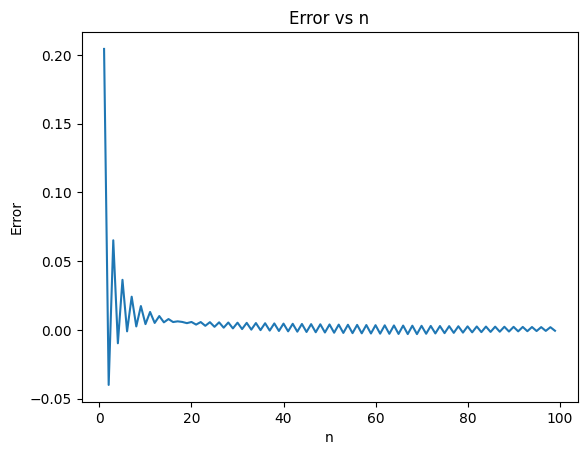

In [10]:
#Plotting the error#
K = 105
nlist = [i for i in range(1,100)]
errlist = []
for n in nlist :
    errlist.append(err(T,n,r,b,sigma,K))

plt.plot(nlist,errlist)
plt.xlabel('n')
plt.ylabel('Error')
plt.title('Error vs n')
plt.show()